## Importing basic libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# dataset loading through mnist
from keras.datasets import mnist

#training three classifiers: decision tree, bagging and random forest.
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utilitities for training and test split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

## Loading MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


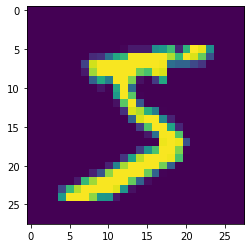

In [4]:
plt.imshow(X_train[0])
plt.show()

In [5]:
print('Shape of training data : ', X_train.shape)
print('Shape of training labels : ', y_train.shape)
print()
print('Shape of testing data : ', X_test.shape)
print('Shape of testing labels : ', y_test.shape)

Shape of training data :  (60000, 28, 28)
Shape of training labels :  (60000,)

Shape of testing data :  (10000, 28, 28)
Shape of testing labels :  (10000,)


In [6]:
# Flatten each input image into a vector of length 784.
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

In [8]:
print('Shape of training data after flattening : ', X_train.shape) 
print('Shape of testing data after flattening : ', X_test.shape)

Shape of training data after flattening :  (60000, 784)
Shape of testing data after flattening :  (10000, 784)


In [16]:
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=42)

## Model Building

In [10]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator, X_train, y_train, cv=cv, scoring='f1_macro')

    print(
        f'On an average, {name} model has f1 score of 'f'{cv_train_score.mean():.3f} (+/-) {cv_train_score.std():.3f} on the training set')

In [11]:
def eval(estimator, X_test ,y_test):
    y_pred = estimator.predict(X_test)

    print('Classification Report :')
    print(classification_report(y_test ,y_pred))

    print('Confusion Matrix : ')
    sns.heatmap(confusion_matrix(y_test ,y_pred) ,cmap='Blues',annot=True ,cbar=True ,fmt='.5g')
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

## Decision trees for MNIST multiclass classification

In [12]:
dt_pipeline = Pipeline([('classifier', DecisionTreeClassifier())])

train_classifiers(dt_pipeline, X_train,y_train, cv, 'decision tree')

On an average, decision tree model has f1 score of 0.867 (+/-) 0.004 on the training set


Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.84      0.86      1032
           3       0.83      0.86      0.85      1010
           4       0.87      0.88      0.87       982
           5       0.84      0.84      0.84       892
           6       0.88      0.89      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.83      0.80      0.82       974
           9       0.85      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix : 


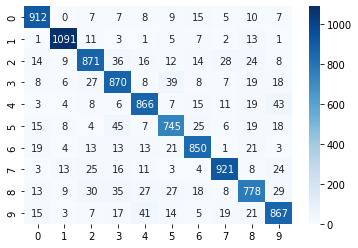

In [13]:
eval(dt_pipeline, X_test, y_test)

## MNIST classification with Bagging

In [17]:
# bagging_pipeline = Pipeline([('scaler',MinMaxScaler()),('classifier',     BaggingClassifier())])

bag_pipeline = Pipeline([('classifier', BaggingClassifier())])

train_classifiers(bag_pipeline, X_train, y_train, cv, 'bagging')

On an average, bagging model has f1 score of 0.938 (+/-) 0.005 on the training set


Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.95      0.94      1032
           3       0.93      0.92      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.92      0.91      0.92       892
           6       0.96      0.95      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.92      0.91      0.92       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix : 


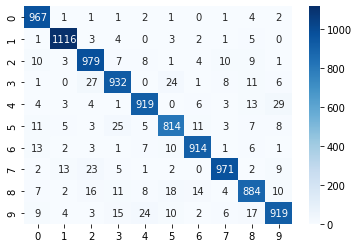

In [18]:
eval(bag_pipeline, X_test, y_test)

## Random forest for MNIST multiclass classification

In [19]:
rf_pipeline = Pipeline([('classifier', RandomForestClassifier())]) 

train_classifiers(rf_pipeline,X_train, y_train, cv, 'random forest')

On an average, random forest model has f1 score of 0.967 (+/-) 0.001 on the training set


Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix : 


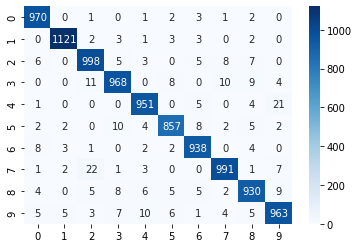

In [20]:
eval(rf_pipeline, X_test, y_test)

The **decision tree classifier** is a baseline classifier, which obtained accuracy of **88%** on the test set.

Using **bagging** and training the same decision tree classifier gave us an increase of 7 percentage point in the accuracy, which translates to **94%** accuracy on the test set.

Finally, the **random forest classifier** pushed that further to **97%**.